In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import os

In [2]:
file_prefix = 'm82/'

In [3]:
files = os.listdir(file_prefix)
print(files)

['FLAT_I_11.fits', 'm82_halpha_2.fits', 'FLAT_G_3.fits', 'FLAT_R_7.fits', 'FLAT_I_2.fits', 'BIAS_3.fits', 'FLAT_HALPHA_3.fits', 'FLAT_HALPHA_2.fits', 'BIAS_2.fits', 'FLAT_R_6.fits', 'FLAT_I_3.fits', 'FLAT_G_2.fits', 'm82_halpha_3.fits', 'FLAT_I_10.fits', 'FLAT_HALPHA_5.fits', 'm82_i_1.fits', 'FLAT_G_9.fits', 'FLAT_HALPHA_10.fits', 'FLAT_I_8.fits', 'BIAS_9.fits', 'FLAT_HALPHA_9.fits', 'FLAT_G_5.fits', 'FLAT_R_1.fits', 'FLAT_I_4.fits', 'BIAS_5.fits', 'BIAS_4.fits', 'FLAT_I_5.fits', 'FLAT_G_4.fits', 'FLAT_HALPHA_8.fits', 'm82_g_1.fits', 'BIAS_8.fits', 'FLAT_I_9.fits', 'FLAT_HALPHA_11.fits', 'FLAT_G_8.fits', 'FLAT_HALPHA_4.fits', 'FLAT_G_11.fits', 'FLAT_R_11.fits', 'm82_i_3.fits', 'FLAT_HALPHA_7.fits', 'BIAS_7.fits', 'FLAT_I_6.fits', 'FLAT_R_3.fits', 'FLAT_G_7.fits', 'FLAT_G_6.fits', 'FLAT_I_7.fits', 'FLAT_R_2.fits', 'BIAS_6.fits', 'FLAT_HALPHA_6.fits', 'm82_i_2.fits', 'FLAT_R_10.fits', 'FLAT_G_10.fits', 'BIAS_1.fits', 'BIAS_10.fits', 'FLAT_R_5.fits', 'FLAT_G_1.fits', 'FLAT_R_9.fits', 'FLA

In [4]:
fits_image_filename = 'm82/BIAS_1.fits'
data = fits.open(fits_image_filename)
print(repr(data[0].header))

SIMPLE  =                    T / Java FITS: Fri May 12 12:22:02 PDT 2023        
BITPIX  =                   32                                                  
NAXIS   =                    2 / Dimensionality                                 
NAXIS1  =                 6244                                                  
NAXIS2  =                 6160                                                  
EXTEND  =                    T / Extensions are permitted                       
EXPTIME =                  0.0 / Exposure time (seconds)                        
SENSORW =                 6144 / sensor width                                   
SENSORH =                 6160 / sensor height                                  
AMPCCDX =                    2 / Amplifiers per CCD X                           
AMPCCDY =                    2 / Amplifiers per CCD Y                           
TIMSCRP = 'wasp_10_8_2019.acf' / Archon asf file name                           
MODULE1 = 'None    '        

# Master Bias

In [5]:
trim = np.s_[:, 50:-50]

Text(0.5, 1.0, 'Master Bias')

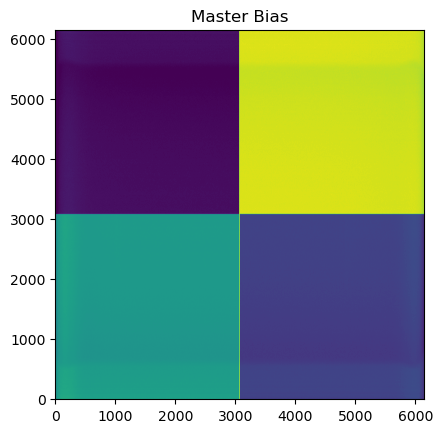

In [6]:
bias_range = range(1, 12)
biases = []
for i in bias_range:
    bias_file = file_prefix + f"BIAS_{i}.fits"
    
    hdul = fits.open(bias_file)
    data = hdul['PRIMARY'].data[trim].astype(float)
    biases.append(data)
    
master_bias = np.median(biases, axis=0)
plt.imshow(master_bias, vmin=np.percentile(master_bias, 1), vmax=np.percentile(master_bias, 99), origin='lower')
plt.title('Master Bias')

# Master Flats

In [7]:
def make_master_flat(flat_range, filt_name, plot=True):
    # TODO: how to adjust for bias?

    flats = []
    
    for i in flat_range:
        flat_file = file_prefix + f"FLAT_{filt_name}_{i}.fits"

        hdul = fits.open(flat_file)
        exp_time = hdul[0].header['EXPTIME']
        filt = hdul[0].header['FILTER']
        data = hdul['PRIMARY'].data[trim].astype(float)
        data -= master_bias
        data /= exp_time
        
        flats.append(data)

    master_flat = np.median(flats, axis=0)
    master_flat /= np.mean(master_flat)
    
    if plot:
        plt.imshow(master_flat, vmin=np.percentile(master_flat, 1), vmax=np.percentile(master_flat, 99), origin='lower')
        plt.title(f'Master Flat {filt}')
        plt.colorbar()
    
    return master_flat

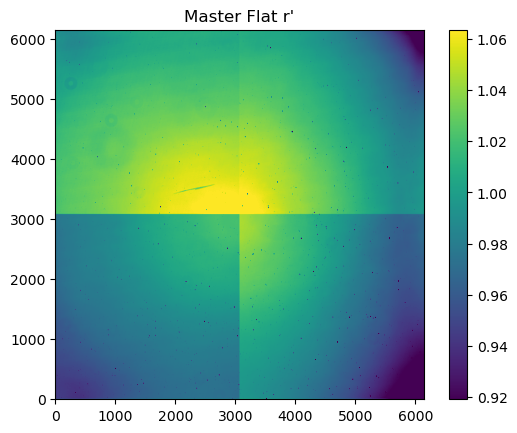

In [8]:
master_flat_r = make_master_flat(range(1, 12), 'R') # r'

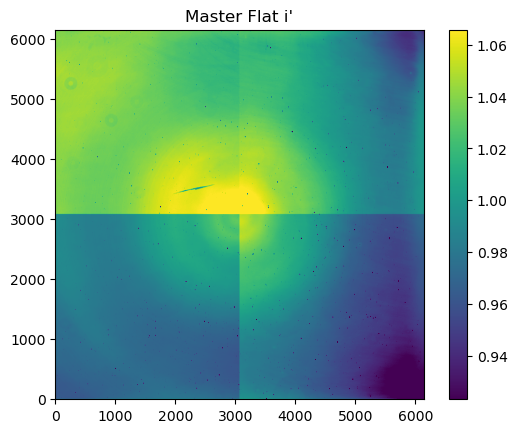

In [9]:
master_flat_i = make_master_flat(range(1, 12), 'I') # i'

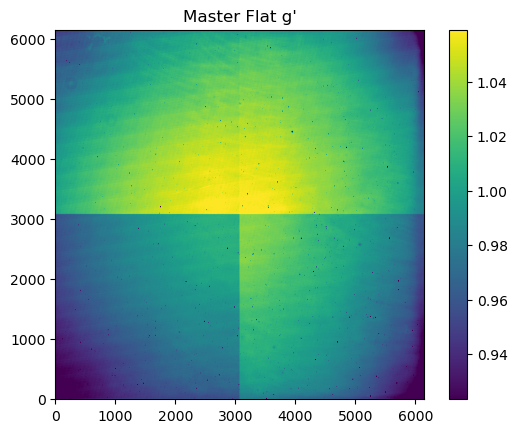

In [10]:
master_flat_g = make_master_flat(range(1, 12), 'G') # g'

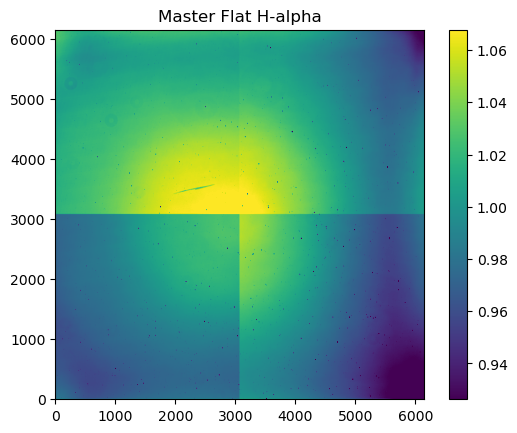

In [11]:
master_flat_halpha = make_master_flat(range(1, 12), 'HALPHA') # h-alpha

# Image Processing

## r'

/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_1351/3733106826.py:8: RuntimeWarning: divide by zero encountered in divide
  m101_r_data = m101_r_data / master_flat_r
/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_1351/3733106826.py:8: RuntimeWarning: invalid value encountered in divide
  m101_r_data = m101_r_data / master_flat_r


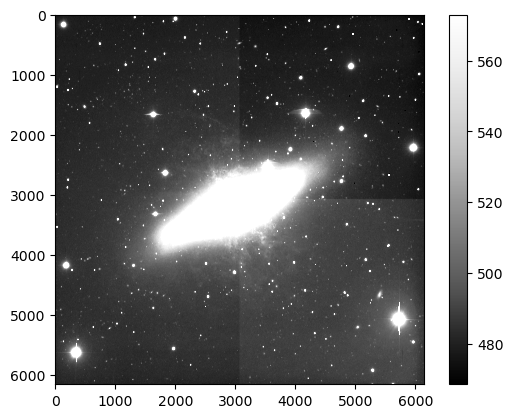

In [45]:
m101_r = file_prefix + "m82_r_1.fits"

hdul = fits.open(m101_r)
exp_time = hdul[0].header['EXPTIME']
m101_r_data = hdul['PRIMARY'].data[trim].astype(float)

m101_r_data = m101_r_data - master_bias
m101_r_data = m101_r_data / master_flat_r
# m101_r_data /= exp_time # TODO: divide by exposure time only for false color img; remove for science data analysis

plt.figure()
plt.imshow(m101_r_data, vmin=np.nanpercentile(m101_r_data, 5), vmax=np.nanpercentile(m101_r_data, 95), cmap='Greys_r')
plt.colorbar()
plt.show()

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kwargs)>

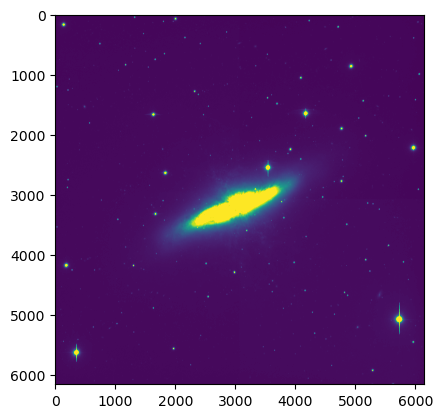

In [46]:
first_percentile = np.nanpercentile(m101_r_data, 1)
last_percentile = np.nanpercentile(m101_r_data, 99)

outliers = np.where(m101_r_data < first_percentile)
m101_r_data[outliers] = first_percentile

outliers = np.where(m101_r_data > last_percentile)
m101_r_data[outliers] = last_percentile

m101_r_counts = np.copy(m101_r_data)

# m101_r_data -= np.nanmin(m101_r_data)
# m101_r_data /= np.nanmax(m101_r_data)

nans = np.where(np.isnan(m101_r_data))
m101_r_data[nans] = np.nanmin(m101_r_data)

plt.imshow(m101_r_data)
plt.colorbar

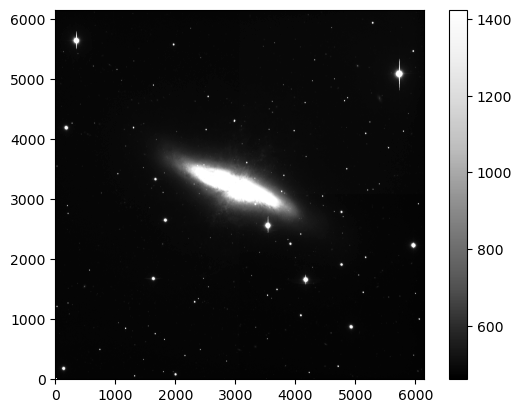

In [47]:
plt.imshow(m101_r_counts, cmap='Greys_r', origin='lower')
plt.colorbar()
hdu = fits.PrimaryHDU(m101_r_data)
hdul = fits.HDUList([hdu])
hdul.writeto('analysis_imgs/r_m82.fits', overwrite=True)

## g'

/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_1351/4207924038.py:8: RuntimeWarning: divide by zero encountered in divide
  m101_g_data = m101_g_data / master_flat_g
/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_1351/4207924038.py:8: RuntimeWarning: invalid value encountered in divide
  m101_g_data = m101_g_data / master_flat_g


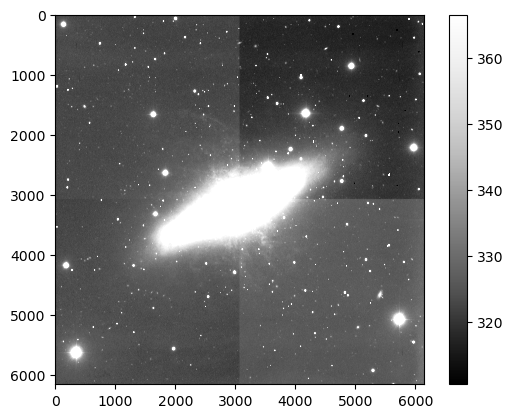

In [22]:
m101_g = file_prefix + "m82_g_1.fits"

hdul = fits.open(m101_g)
exp_time = hdul[0].header['EXPTIME']
m101_g_data = hdul['PRIMARY'].data[trim].astype(float)

m101_g_data = m101_g_data - master_bias
m101_g_data = m101_g_data / master_flat_g
# m101_g_data /= exp_time

plt.figure()
plt.imshow(m101_g_data, vmin=np.nanpercentile(m101_g_data, 5), vmax=np.nanpercentile(m101_g_data, 95), cmap='Greys_r')
plt.colorbar()
plt.show()

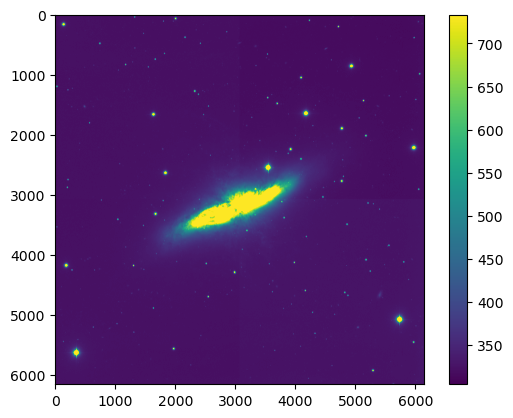

In [23]:
first_percentile = np.nanpercentile(m101_g_data, 1)
last_percentile = np.nanpercentile(m101_g_data, 99)


outliers = np.where(m101_g_data < first_percentile)
m101_g_data[outliers] = first_percentile

outliers = np.where(m101_g_data > last_percentile)
m101_g_data[outliers] = last_percentile

m101_g_counts = np.copy(m101_g_data)
# m101_g_data -= np.nanmin(m101_g_data)
# m101_g_data /= np.nanmax(m101_g_data)

nans = np.where(np.isnan(m101_g_data))
m101_g_data[nans] = np.nanmin(m101_g_data)

plt.imshow(m101_g_data)
plt.colorbar()

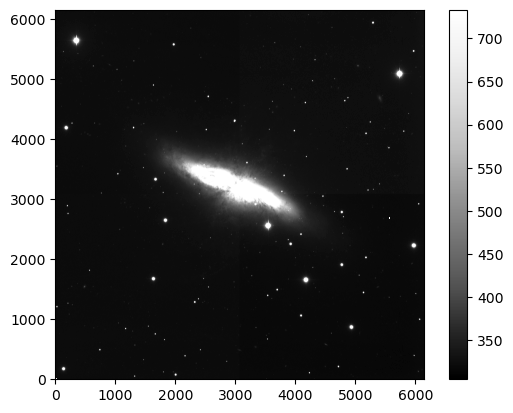

In [24]:
plt.imshow(m101_g_counts, cmap='Greys_r', origin='lower')
plt.colorbar()
hdu = fits.PrimaryHDU(m101_g_data)
hdul = fits.HDUList([hdu])
hdul.writeto('analysis_imgs/g_m82.fits', overwrite=True)

## i'

/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_1351/2184141157.py:12: RuntimeWarning: invalid value encountered in divide
  m101_i_data = m101_i_data / master_flat_i


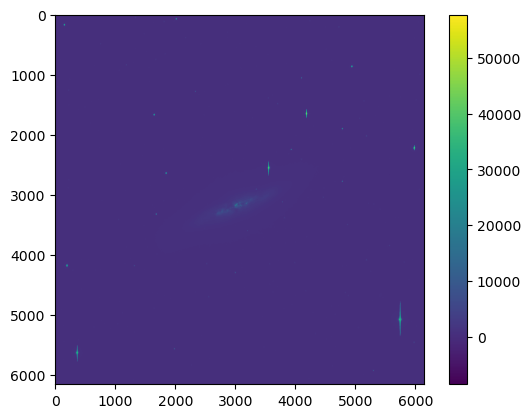

In [39]:
i_range = range(1, 4)

i_data = []
for i in i_range:
    i_file = file_prefix + f"m82_i_{i}.fits"
    
    hdul = fits.open(i_file)
    exp_time = hdul[0].header['EXPTIME']
    m101_i_data = hdul['PRIMARY'].data[trim].astype(float)

    m101_i_data = m101_i_data - master_bias
    m101_i_data = m101_i_data / master_flat_i
#     m101_i_data /= exp_time
    
    i_data.append(m101_i_data)
    
m101_i_data = np.median(i_data, axis=0)

plt.figure()
plt.imshow(m101_i_data, vmin=np.nanpercentile(m101_i_data, 5), vmax=np.nanpercentile(m101_i_data, 95), cmap='Greys_r')
plt.imshow(m101_i_data)
plt.colorbar()
plt.show()

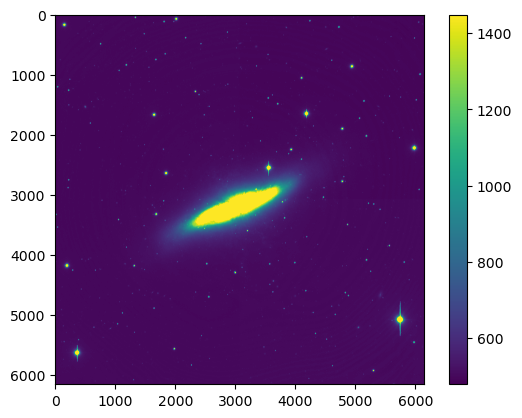

In [40]:
first_percentile = np.nanpercentile(m101_i_data, 1)
last_percentile = np.nanpercentile(m101_i_data, 99)


outliers = np.where(m101_i_data < first_percentile)
m101_i_data[outliers] = first_percentile

outliers = np.where(m101_i_data > last_percentile)
m101_i_data[outliers] = last_percentile

m101_i_counts = np.copy(m101_i_data)

# m101_i_data -= np.nanmin(m101_i_data)
# m101_i_data /= np.nanmax(m101_i_data)

nans = np.where(np.isnan(m101_i_data))
m101_i_data[nans] = np.nanmin(m101_i_data)

plt.imshow(m101_i_data)
plt.colorbar()

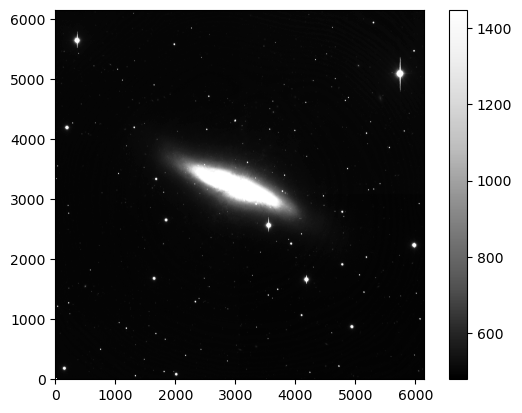

In [41]:
plt.imshow(m101_i_counts, cmap='Greys_r', origin='lower')
plt.colorbar()
hdu = fits.PrimaryHDU(m101_i_data)
hdul = fits.HDUList([hdu])
hdul.writeto('analysis_imgs/i_m82.fits', overwrite=True)

## h-alpha

/var/folders/7z/jfmx8yvn19d5mcq2xc1n5t2m0000gn/T/ipykernel_1351/1694119229.py:12: RuntimeWarning: invalid value encountered in divide
  m101_halpha_data = m101_halpha_data / master_flat_halpha


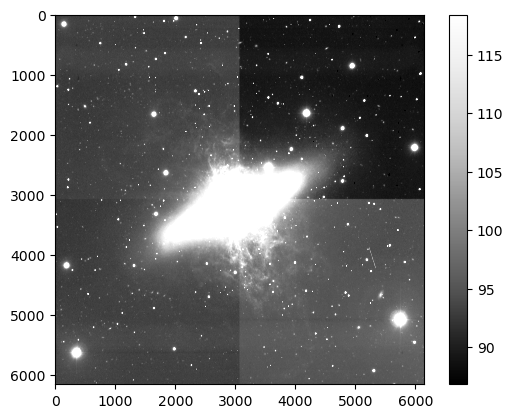

In [42]:
halpha_range = range(1, 3)

halpha_data = []
for i in halpha_range:
    halpha_file = file_prefix + f"m82_halpha_{i}.fits"
    
    hdul = fits.open(halpha_file)
    exp_time = hdul[0].header['EXPTIME']
    m101_halpha_data = hdul['PRIMARY'].data[trim].astype(float)

    m101_halpha_data = m101_halpha_data - master_bias
    m101_halpha_data = m101_halpha_data / master_flat_halpha
#     m101_halpha_data /= exp_time
    
    halpha_data.append(m101_halpha_data)
    
m101_halpha_data = np.median(halpha_data, axis=0)

plt.figure()
plt.imshow(m101_halpha_data, vmin=np.nanpercentile(m101_halpha_data, 5), vmax=np.nanpercentile(m101_halpha_data, 95), cmap='Greys_r')
plt.colorbar()
plt.show()

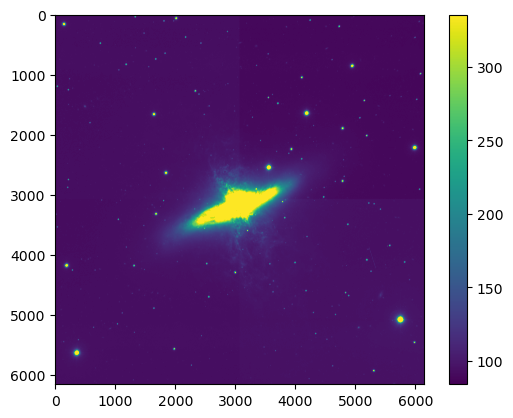

In [43]:
first_percentile = np.nanpercentile(m101_halpha_data, 1)
last_percentile = np.nanpercentile(m101_halpha_data, 99)


outliers = np.where(m101_halpha_data < first_percentile)
m101_halpha_data[outliers] = first_percentile

outliers = np.where(m101_halpha_data > last_percentile)
m101_halpha_data[outliers] = last_percentile

m101_halpha_counts = np.copy(m101_halpha_data)

# m101_halpha_data -= np.nanmin(m101_halpha_data)
# m101_halpha_data /= np.nanmax(m101_halpha_data)

nans = np.where(np.isnan(m101_halpha_data))
m101_halpha_data[nans] = np.nanmin(m101_halpha_data)

plt.imshow(m101_halpha_data)
plt.colorbar()

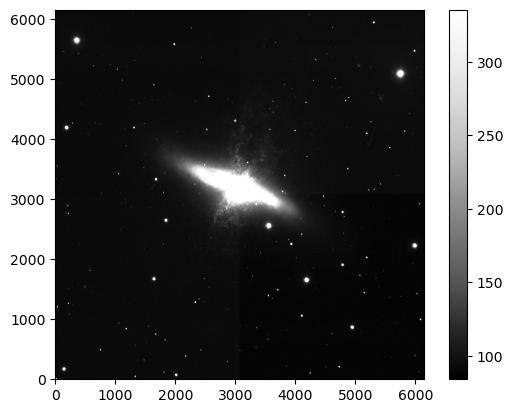

In [44]:
plt.imshow(m101_halpha_counts, cmap='Greys_r', origin='lower')
plt.colorbar()
hdu = fits.PrimaryHDU(m101_halpha_data)
hdul = fits.HDUList([hdu])
hdul.writeto('analysis_imgs/halpha_m82.fits', overwrite=True)

# False Color Image

In [ ]:
# rgb image with imshow
# shape: (x, y, 3) --> last axis is channel order
# float arr have to go from 0 to 1, int arr go from 0 to 255
# remove outliers (set less than first percentile to first percentile)
# could do 4 channels with transparency adjusted by halpha

# stacked = m101_r_data + m101_g_data + m101_i_data + m101_halpha_data


rgbArray = np.zeros((6160,6144,3), 'float')
rgbArray[..., 0] = m101_halpha_data
rgbArray[..., 1] = m101_g_data
rgbArray[..., 2] = m101_r_data

# img_data = np.array([m101_r_data, m101_g_data, m101_halpha_data]).reshape((6160, 6244, 3))
plt.figure(figsize=(10, 10))
plt.imshow(rgbArray)
plt.title("M82: Cigar Galaxy")

## Subtracting r' and h-alpha filters

In [53]:
# m101_r_data, m101_halpha_data
m101_r_data -= np.nanmin(m101_r_data)
m101_r_data /= np.nanmax(m101_r_data)

m101_halpha_data -= np.nanmin(m101_halpha_data)
m101_halpha_data /= np.nanmax(m101_halpha_data)
m101_subtracted = abs(np.subtract(m101_halpha_data, m101_r_data))

NameError: name 'm101_r_data' is not defined

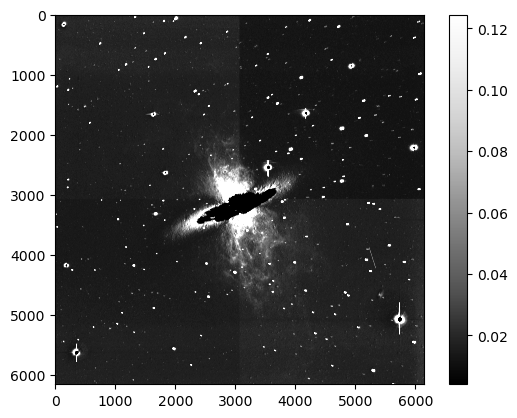

In [49]:
plt.imshow(m101_subtracted, vmin=np.nanpercentile(m101_subtracted, 15), vmax=np.nanpercentile(m101_subtracted, 99), cmap='Greys_r')
plt.colorbar()


In [50]:
hdu = fits.PrimaryHDU(m101_subtracted)
hdul = fits.HDUList([hdu])
hdul.writeto('analysis_imgs/m82_subtracted.fits', overwrite=True)

## Fraction of star formation

In [48]:
fits_image_filename = 'analysis_imgs/halpha_m82.fits'
m82_halpha_data = fits.open(fits_image_filename)
m82_halpha = m82_halpha_data['PRIMARY'].data.astype('float')

In [49]:
fits_image_filename = 'analysis_imgs/m82_subtracted.fits'
m82_subtracted_data = fits.open(fits_image_filename)
m82_subtracted = m82_subtracted_data['PRIMARY'].data.astype('float')

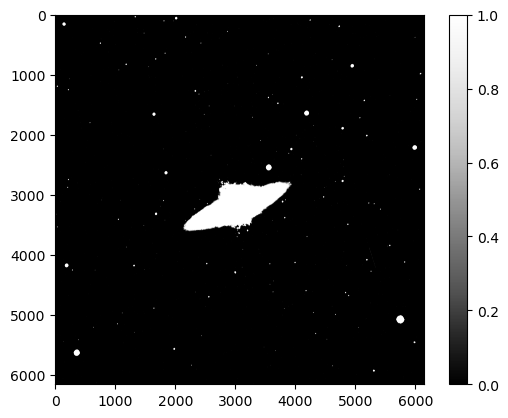

In [50]:
# r': 1000, sub: 0.04
m82_halpha_copy = m82_halpha.copy()
signal = np.where(m82_halpha > 175)
no_signal = np.where(m82_halpha <= 175)

r_surface_pix = len(signal[0])

m82_halpha_copy[signal] = 1
m82_halpha_copy[no_signal] = 0

plt.imshow(m82_halpha_copy, cmap='Greys_r')
plt.colorbar()

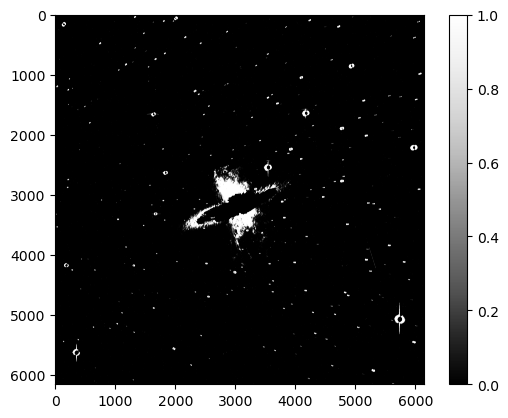

In [51]:
m82_subtracted_copy = m82_subtracted.copy()
signal = np.where(m82_subtracted > 0.1)
no_signal = np.where(m82_subtracted <= 0.1)

subtracted_surface_pix = len(signal[0])

m82_subtracted_copy[signal] = 1
m82_subtracted_copy[no_signal] = 0

plt.imshow(m82_subtracted_copy, cmap='Greys_r')
plt.colorbar()

In [52]:
frac_star_formation = subtracted_surface_pix / r_surface_pix
frac_star_formation

0.5752707672334966